# Project 7

## Sys Ops

In [1]:
cd ..

C:\Users\rudyg\Documents\GitHub\P7-ML


In [2]:
pwd

'C:\\Users\\rudyg\\Documents\\GitHub\\P7-ML'

In [3]:
#mlflow.set_experiment("Reg_Logistic_Models")
#mlflow.sklearn.autolog()

## Imports 

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import missingno as msno

from sklearn.feature_selection import *
from sklearn.feature_extraction import *
from sklearn.decomposition import *
from sklearn.model_selection import *
from sklearn.impute import *
from sklearn.preprocessing import *
from sklearn.pipeline import *
from sklearn.covariance import *
from sklearn.metrics import *
from sklearn.compose import *

from sklearn.dummy import *
from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.svm import *
from sklearn.ensemble import *
from sklearn.cluster import *

## Data

In [5]:
fn = "application_train.csv"
df = pd.read_csv("./data/source/" + fn)

In [6]:
df.shape

(307511, 122)

In [7]:
df = df.sample(frac = 0.1)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
2533,102954,0,Cash loans,F,N,Y,3,135000.0,729792.0,24246.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
160311,285835,0,Revolving loans,M,Y,N,0,450000.0,1350000.0,67500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
125863,245952,0,Cash loans,M,N,Y,0,180000.0,122256.0,12964.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
242029,380224,1,Cash loans,M,Y,Y,0,252000.0,450000.0,24543.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
240303,378295,0,Cash loans,M,Y,Y,0,166500.0,299772.0,19647.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268831,411539,0,Cash loans,F,Y,Y,0,135000.0,405000.0,41629.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
267120,409488,0,Cash loans,F,Y,N,0,139500.0,450000.0,27193.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
296800,443864,0,Cash loans,F,N,Y,0,405000.0,1006920.0,51543.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0
41140,147634,0,Cash loans,F,N,Y,2,202500.0,545040.0,26640.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [8]:
# filter for correl
# df = df.filter(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
#                'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED'
#                ])

df = df.filter(
    [
        "SK_ID_CURR",
        "TARGET",
        "NAME_CONTRACT_TYPE",
        "CODE_GENDER",
        "FLAG_OWN_CAR",
        "FLAG_OWN_REALTY",
        "CNT_CHILDREN",
        "AMT_INCOME_TOTAL",
        "AMT_CREDIT",
        "AMT_ANNUITY",
        "AMT_GOODS_PRICE",
        "NAME_TYPE_SUITE",
        "NAME_INCOME_TYPE",
        "NAME_EDUCATION_TYPE",
        "NAME_FAMILY_STATUS",
        "NAME_HOUSING_TYPE",
        "DAYS_BIRTH",
        "DAYS_EMPLOYED",
        "ORGANIZATION_TYPE",
        "OCCUPATION_TYPE",
        "EXT_SOURCE_1",
        "EXT_SOURCE_2",
        "EXT_SOURCE_3",
    ]
)


df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
2533,102954,0,Cash loans,F,N,Y,3,135000.0,729792.0,24246.0,...,Secondary / secondary special,Married,House / apartment,-13891,-787,Trade: type 7,Sales staff,NaN,0.682576,0.513694
160311,285835,0,Revolving loans,M,Y,N,0,450000.0,1350000.0,67500.0,...,Higher education,Married,House / apartment,-19114,-4404,Police,Managers,NaN,0.666005,0.207964
125863,245952,0,Cash loans,M,N,Y,0,180000.0,122256.0,12964.5,...,Secondary / secondary special,Single / not married,House / apartment,-13026,-5107,Military,Managers,NaN,0.160485,0.540654
242029,380224,1,Cash loans,M,Y,Y,0,252000.0,450000.0,24543.0,...,Higher education,Married,House / apartment,-16350,-2142,Other,Laborers,0.147119,0.675417,NaN
240303,378295,0,Cash loans,M,Y,Y,0,166500.0,299772.0,19647.0,...,Secondary / secondary special,Married,With parents,-11768,-2277,Business Entity Type 2,Laborers,0.295527,0.262258,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268831,411539,0,Cash loans,F,Y,Y,0,135000.0,405000.0,41629.5,...,Secondary / secondary special,Married,House / apartment,-20223,365243,XNA,NaN,NaN,0.376371,0.808394
267120,409488,0,Cash loans,F,Y,N,0,139500.0,450000.0,27193.5,...,Secondary / secondary special,Married,House / apartment,-20074,-1172,Self-employed,Sales staff,0.868874,0.215600,0.331251
296800,443864,0,Cash loans,F,N,Y,0,405000.0,1006920.0,51543.0,...,Secondary / secondary special,Single / not married,House / apartment,-14315,-531,Business Entity Type 3,NaN,0.455284,0.495557,0.368969
41140,147634,0,Cash loans,F,N,Y,2,202500.0,545040.0,26640.0,...,Secondary / secondary special,Widow,House / apartment,-13945,-1807,Self-employed,Sales staff,0.326714,0.303710,0.438281


## EDA Exploratory Data Analysis

In [9]:
df.sort_values("AMT_INCOME_TOTAL", ascending=False)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
181698,310601,0,Cash loans,M,Y,Y,1,3950059.5,675000.0,66217.5,...,Higher education,Married,With parents,-10572,-3163,Trade: type 2,Managers,NaN,0.597760,0.730987
145673,268905,0,Revolving loans,M,Y,N,0,2250000.0,2250000.0,225000.0,...,Higher education,Married,House / apartment,-14347,-5542,Business Entity Type 3,Managers,0.739337,0.789567,NaN
293342,439846,0,Cash loans,M,Y,Y,0,1575000.0,2031651.0,188136.0,...,Higher education,Married,House / apartment,-10959,-1081,Transport: type 4,Sales staff,NaN,0.379368,0.297087
134052,255468,0,Revolving loans,M,N,N,0,1350000.0,675000.0,33750.0,...,Higher education,Married,House / apartment,-15042,-3982,Business Entity Type 3,Managers,0.846541,0.728681,NaN
229099,365355,0,Revolving loans,F,Y,Y,0,1350000.0,900000.0,45000.0,...,Higher education,Married,House / apartment,-14822,-2402,Insurance,Sales staff,0.791478,0.470504,0.300108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266843,409147,0,Cash loans,M,Y,N,0,27000.0,284400.0,16011.0,...,Secondary / secondary special,Married,House / apartment,-19663,-12092,Other,NaN,NaN,0.562510,0.654529
83674,197045,0,Cash loans,F,N,N,2,27000.0,269550.0,14751.0,...,Secondary / secondary special,Married,House / apartment,-10319,-2308,Government,Laborers,0.214834,0.751604,0.445396
199006,330720,0,Cash loans,F,N,Y,1,27000.0,450000.0,22018.5,...,Secondary / secondary special,Married,House / apartment,-10832,-532,Kindergarten,Cleaning staff,0.362224,0.582512,0.424130
175433,303289,0,Cash loans,F,Y,Y,0,26550.0,571500.0,16281.0,...,Secondary / secondary special,Widow,House / apartment,-20185,365243,XNA,NaN,NaN,0.679541,NaN


In [10]:
df.sort_values("AMT_CREDIT", ascending=False)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
17948,120926,0,Cash loans,M,Y,N,2,783000.0,4050000.0,258025.5,...,Higher education,Married,House / apartment,-15176,-201,Industry: type 4,Managers,0.755408,0.706927,0.553165
239197,377037,0,Cash loans,F,Y,N,0,436500.0,3150000.0,79632.0,...,Higher education,Single / not married,House / apartment,-12932,-2569,Insurance,Sales staff,0.337963,0.571807,0.526295
32197,137330,0,Cash loans,M,Y,N,0,562500.0,2695500.0,74124.0,...,Higher education,Married,House / apartment,-22283,-1542,Industry: type 9,High skill tech staff,NaN,0.649880,0.742182
157733,282833,0,Cash loans,M,Y,Y,1,292500.0,2695500.0,74254.5,...,Higher education,Married,House / apartment,-18312,365243,XNA,NaN,0.644862,0.712800,0.706205
193640,324546,1,Cash loans,M,Y,N,0,450000.0,2695500.0,71235.0,...,Secondary / secondary special,Married,Office apartment,-13233,-530,Business Entity Type 3,IT staff,0.600116,0.721990,0.071533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123513,243234,0,Cash loans,F,N,Y,0,67500.0,45000.0,4513.5,...,Secondary / secondary special,Separated,House / apartment,-20055,365243,XNA,NaN,0.697738,0.265256,0.843544
154210,278727,0,Cash loans,M,Y,Y,0,67500.0,45000.0,3136.5,...,Secondary / secondary special,Single / not married,House / apartment,-22383,365243,XNA,NaN,NaN,0.639360,0.602386
252332,391967,0,Cash loans,F,N,Y,0,81000.0,45000.0,4383.0,...,Secondary / secondary special,Married,House / apartment,-17191,-10249,Medicine,Medicine staff,NaN,0.612026,0.773896
214287,348315,0,Cash loans,M,N,Y,0,90000.0,45000.0,4513.5,...,Higher education,Separated,House / apartment,-20511,-877,Government,NaN,NaN,0.591011,NaN


In [11]:
df.sort_values("AMT_ANNUITY", ascending=False)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
17948,120926,0,Cash loans,M,Y,N,2,783000.0,4050000.0,258025.5,...,Higher education,Married,House / apartment,-15176,-201,Industry: type 4,Managers,0.755408,0.706927,0.553165
12108,114122,0,Revolving loans,M,Y,Y,0,1080000.0,2250000.0,225000.0,...,Higher education,Married,House / apartment,-15323,-6281,Bank,Managers,NaN,0.750889,NaN
132913,254159,0,Revolving loans,F,N,Y,3,675000.0,2250000.0,225000.0,...,Higher education,Married,House / apartment,-14827,-2693,Business Entity Type 3,NaN,0.847550,0.646549,NaN
145673,268905,0,Revolving loans,M,Y,N,0,2250000.0,2250000.0,225000.0,...,Higher education,Married,House / apartment,-14347,-5542,Business Entity Type 3,Managers,0.739337,0.789567,NaN
301712,449536,0,Cash loans,F,Y,N,1,427500.0,2339100.0,216589.5,...,Secondary / secondary special,Married,House / apartment,-13926,-6743,Medicine,Medicine staff,0.570476,0.687497,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131591,252622,0,Cash loans,F,N,N,0,103500.0,58500.0,2983.5,...,Higher education,Married,House / apartment,-13725,-2856,Self-employed,Accountants,0.723177,0.569964,0.441836
170692,297821,0,Cash loans,F,N,N,0,27900.0,53910.0,2880.0,...,Secondary / secondary special,Married,House / apartment,-20732,365243,XNA,NaN,NaN,0.589927,0.236611
221697,356817,0,Cash loans,F,Y,Y,0,90000.0,67500.0,2673.0,...,Secondary / secondary special,Married,House / apartment,-18857,-8479,School,High skill tech staff,NaN,0.405166,0.612704
258882,399594,0,Cash loans,F,N,Y,0,135000.0,45000.0,2299.5,...,Secondary / secondary special,Widow,House / apartment,-22901,365243,XNA,NaN,NaN,0.617361,0.410103


In [12]:
df.sort_values("AMT_GOODS_PRICE", ascending=False)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
17948,120926,0,Cash loans,M,Y,N,2,783000.0,4050000.0,258025.5,...,Higher education,Married,House / apartment,-15176,-201,Industry: type 4,Managers,0.755408,0.706927,0.553165
239197,377037,0,Cash loans,F,Y,N,0,436500.0,3150000.0,79632.0,...,Higher education,Single / not married,House / apartment,-12932,-2569,Insurance,Sales staff,0.337963,0.571807,0.526295
62299,172248,0,Cash loans,F,Y,N,1,202806.0,2340000.0,59152.5,...,Higher education,Married,House / apartment,-8918,-1469,Mobile,Sales staff,0.664468,0.313000,0.513694
158579,283845,0,Cash loans,M,Y,N,0,495000.0,2295000.0,50670.0,...,Secondary / secondary special,Married,House / apartment,-10558,-818,Bank,NaN,0.232224,0.457192,NaN
61562,171404,0,Cash loans,M,Y,N,0,460525.5,2254500.0,64813.5,...,Higher education,Single / not married,House / apartment,-9812,-912,Trade: type 2,Managers,0.276248,0.527009,0.490258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267302,409698,0,Revolving loans,F,N,Y,0,67500.0,180000.0,9000.0,...,Secondary / secondary special,Widow,House / apartment,-18120,-915,Business Entity Type 3,Laborers,NaN,0.669807,0.651260
79108,191700,0,Revolving loans,F,N,Y,1,103500.0,270000.0,13500.0,...,Secondary / secondary special,Civil marriage,House / apartment,-16145,-4327,Business Entity Type 3,Laborers,0.249658,0.688797,0.206779
85172,198819,0,Revolving loans,F,N,Y,1,139500.0,270000.0,13500.0,...,Secondary / secondary special,Married,House / apartment,-13244,-109,Business Entity Type 3,NaN,0.491681,0.217530,0.474051
116575,235188,0,Revolving loans,F,N,Y,0,112500.0,180000.0,9000.0,...,Secondary / secondary special,Widow,House / apartment,-23089,365243,XNA,NaN,NaN,0.439298,0.683269


In [13]:
# on exclut ces lignes car elles font planter le fit

df = df.drop(df[(df['NAME_INCOME_TYPE'] == 'Businessman')].index)
df = df.drop(df[(df['NAME_INCOME_TYPE'] == 'Maternity leave')].index)
df = df.drop(df[(df['NAME_INCOME_TYPE'] == 'Student')].index)
df = df.drop(df[(df['NAME_INCOME_TYPE'] == 'Unemployed')].index)

df = df.drop(df[(df['NAME_FAMILY_STATUS'] == 'Unknown')].index)

df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
2533,102954,0,Cash loans,F,N,Y,3,135000.0,729792.0,24246.0,...,Secondary / secondary special,Married,House / apartment,-13891,-787,Trade: type 7,Sales staff,NaN,0.682576,0.513694
160311,285835,0,Revolving loans,M,Y,N,0,450000.0,1350000.0,67500.0,...,Higher education,Married,House / apartment,-19114,-4404,Police,Managers,NaN,0.666005,0.207964
125863,245952,0,Cash loans,M,N,Y,0,180000.0,122256.0,12964.5,...,Secondary / secondary special,Single / not married,House / apartment,-13026,-5107,Military,Managers,NaN,0.160485,0.540654
242029,380224,1,Cash loans,M,Y,Y,0,252000.0,450000.0,24543.0,...,Higher education,Married,House / apartment,-16350,-2142,Other,Laborers,0.147119,0.675417,NaN
240303,378295,0,Cash loans,M,Y,Y,0,166500.0,299772.0,19647.0,...,Secondary / secondary special,Married,With parents,-11768,-2277,Business Entity Type 2,Laborers,0.295527,0.262258,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268831,411539,0,Cash loans,F,Y,Y,0,135000.0,405000.0,41629.5,...,Secondary / secondary special,Married,House / apartment,-20223,365243,XNA,NaN,NaN,0.376371,0.808394
267120,409488,0,Cash loans,F,Y,N,0,139500.0,450000.0,27193.5,...,Secondary / secondary special,Married,House / apartment,-20074,-1172,Self-employed,Sales staff,0.868874,0.215600,0.331251
296800,443864,0,Cash loans,F,N,Y,0,405000.0,1006920.0,51543.0,...,Secondary / secondary special,Single / not married,House / apartment,-14315,-531,Business Entity Type 3,NaN,0.455284,0.495557,0.368969
41140,147634,0,Cash loans,F,N,Y,2,202500.0,545040.0,26640.0,...,Secondary / secondary special,Widow,House / apartment,-13945,-1807,Self-employed,Sales staff,0.326714,0.303710,0.438281


In [14]:
df.sort_values("DAYS_BIRTH", ascending=False)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
73870,185672,0,Cash loans,M,N,Y,0,94050.0,900297.0,24754.5,...,Incomplete higher,Single / not married,House / apartment,-7680,-852,Trade: type 2,Core staff,0.370862,0.517374,0.553165
227157,363112,0,Revolving loans,F,N,N,0,67500.0,180000.0,9000.0,...,Secondary / secondary special,Married,House / apartment,-7688,-550,Business Entity Type 2,Sales staff,NaN,0.094795,NaN
12949,115094,0,Revolving loans,F,N,Y,1,180000.0,180000.0,9000.0,...,Secondary / secondary special,Married,House / apartment,-7690,-216,Transport: type 4,Sales staff,NaN,0.228687,0.344155
83058,196326,0,Cash loans,F,N,N,0,119250.0,568800.0,15003.0,...,Higher education,Civil marriage,House / apartment,-7692,-564,Trade: type 2,Sales staff,NaN,0.409976,0.337673
113654,231811,1,Revolving loans,F,N,N,0,81000.0,180000.0,9000.0,...,Secondary / secondary special,Single / not married,House / apartment,-7692,-736,Business Entity Type 3,Sales staff,NaN,0.118126,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115368,233786,0,Cash loans,F,N,Y,0,112500.0,167895.0,15907.5,...,Secondary / secondary special,Married,House / apartment,-25148,365243,XNA,NaN,NaN,0.686792,NaN
265889,408005,0,Cash loans,M,Y,Y,0,238500.0,246357.0,24129.0,...,Secondary / secondary special,Married,Office apartment,-25152,365243,XNA,NaN,NaN,0.651152,0.720944
36049,141758,0,Cash loans,F,N,N,0,67500.0,191880.0,17883.0,...,Secondary / secondary special,Single / not married,House / apartment,-25155,365243,XNA,NaN,NaN,0.159896,0.399676
234005,371052,0,Cash loans,M,N,N,0,65250.0,143910.0,14148.0,...,Secondary / secondary special,Married,House / apartment,-25156,365243,XNA,NaN,NaN,0.565430,0.712155


In [15]:
df.sort_values("DAYS_EMPLOYED", ascending=False)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
292094,438383,0,Cash loans,F,N,Y,0,90000.0,350860.5,14994.0,...,Secondary / secondary special,Civil marriage,House / apartment,-23586,365243,XNA,NaN,NaN,0.154265,0.403142
60976,170712,0,Cash loans,F,N,Y,0,157500.0,436032.0,16564.5,...,Secondary / secondary special,Married,House / apartment,-21584,365243,XNA,NaN,NaN,0.180370,0.634706
192435,323146,0,Cash loans,F,Y,Y,0,51300.0,254700.0,25321.5,...,Secondary / secondary special,Married,House / apartment,-24724,365243,XNA,NaN,NaN,0.657941,0.593718
271745,415029,0,Cash loans,F,N,N,0,31500.0,133528.5,8824.5,...,Secondary / secondary special,Single / not married,Municipal apartment,-21490,365243,XNA,NaN,NaN,0.711787,NaN
32361,137516,0,Revolving loans,F,N,Y,0,67500.0,337500.0,16875.0,...,Secondary / secondary special,Married,House / apartment,-23261,365243,XNA,NaN,0.826994,0.678754,0.547810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191519,322069,0,Cash loans,F,N,N,0,135000.0,254700.0,24808.5,...,Secondary / secondary special,Widow,House / apartment,-24063,-15834,Business Entity Type 2,NaN,NaN,0.672631,0.803885
90234,204760,0,Cash loans,F,N,Y,0,135000.0,490495.5,26262.0,...,Secondary / secondary special,Married,House / apartment,-23205,-15911,Medicine,Managers,NaN,0.258221,0.612704
156302,281181,0,Cash loans,F,Y,Y,0,175500.0,592560.0,32274.0,...,Secondary / secondary special,Married,House / apartment,-23641,-16037,Business Entity Type 2,Laborers,NaN,0.739037,0.270707
121283,240611,0,Cash loans,M,N,Y,0,202500.0,1078200.0,38331.0,...,Secondary / secondary special,Married,House / apartment,-23087,-16364,Business Entity Type 3,Low-skill Laborers,NaN,0.547421,0.740799


In [16]:
# Je flague à NaN les valeurs aberrantes (365243) de la feature « DAYS EMPLOYED »

df.loc[df["DAYS_EMPLOYED"] == 365243, "DAYS_EMPLOYED"] = float("NaN")

In [17]:
df.sort_values("DAYS_EMPLOYED", ascending=False)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
88001,202160,0,Cash loans,F,N,Y,0,90000.0,990432.0,38547.0,...,Secondary / secondary special,Married,With parents,-8275,-4.0,Self-employed,Sales staff,NaN,0.638301,NaN
53901,162453,0,Cash loans,M,Y,N,0,225000.0,1249740.0,66712.5,...,Secondary / secondary special,Married,Municipal apartment,-19048,-6.0,Business Entity Type 3,Laborers,NaN,0.687614,NaN
11329,113196,0,Cash loans,F,N,Y,0,315000.0,450000.0,30204.0,...,Secondary / secondary special,Separated,House / apartment,-19270,-11.0,Business Entity Type 3,NaN,0.572104,0.457485,0.593718
256468,396781,0,Cash loans,M,N,Y,0,126000.0,343800.0,13090.5,...,Higher education,Single / not married,House / apartment,-11842,-26.0,Business Entity Type 3,Laborers,NaN,0.471910,0.526295
101232,217534,1,Cash loans,M,N,Y,0,135000.0,203760.0,13396.5,...,Secondary / secondary special,Single / not married,House / apartment,-15449,-34.0,Industry: type 11,NaN,NaN,0.309250,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274930,418661,0,Cash loans,F,N,Y,0,76500.0,178290.0,10363.5,...,Secondary / secondary special,Married,House / apartment,-20759,NaN,XNA,NaN,NaN,0.466012,0.719491
201316,333350,0,Cash loans,F,N,Y,0,315000.0,670185.0,44784.0,...,Secondary / secondary special,Married,House / apartment,-22217,NaN,XNA,NaN,NaN,0.192316,NaN
85707,199459,0,Cash loans,F,N,Y,0,99000.0,254700.0,24939.0,...,Secondary / secondary special,Married,House / apartment,-24608,NaN,XNA,NaN,0.773475,0.581656,0.803885
163022,288991,0,Cash loans,M,N,Y,0,76500.0,98910.0,7033.5,...,Lower secondary,Married,House / apartment,-20704,NaN,XNA,NaN,NaN,0.169953,0.695622


In [18]:
df.sort_values("DAYS_EMPLOYED", ascending=True)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
208899,342112,0,Cash loans,F,N,N,0,225000.0,247275.0,17716.5,...,Secondary / secondary special,Married,House / apartment,-24460,-17546.0,Medicine,NaN,NaN,0.645489,0.744932
121283,240611,0,Cash loans,M,N,Y,0,202500.0,1078200.0,38331.0,...,Secondary / secondary special,Married,House / apartment,-23087,-16364.0,Business Entity Type 3,Low-skill Laborers,NaN,0.547421,0.740799
156302,281181,0,Cash loans,F,Y,Y,0,175500.0,592560.0,32274.0,...,Secondary / secondary special,Married,House / apartment,-23641,-16037.0,Business Entity Type 2,Laborers,NaN,0.739037,0.270707
90234,204760,0,Cash loans,F,N,Y,0,135000.0,490495.5,26262.0,...,Secondary / secondary special,Married,House / apartment,-23205,-15911.0,Medicine,Managers,NaN,0.258221,0.612704
191519,322069,0,Cash loans,F,N,N,0,135000.0,254700.0,24808.5,...,Secondary / secondary special,Widow,House / apartment,-24063,-15834.0,Business Entity Type 2,NaN,NaN,0.672631,0.803885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274930,418661,0,Cash loans,F,N,Y,0,76500.0,178290.0,10363.5,...,Secondary / secondary special,Married,House / apartment,-20759,NaN,XNA,NaN,NaN,0.466012,0.719491
201316,333350,0,Cash loans,F,N,Y,0,315000.0,670185.0,44784.0,...,Secondary / secondary special,Married,House / apartment,-22217,NaN,XNA,NaN,NaN,0.192316,NaN
85707,199459,0,Cash loans,F,N,Y,0,99000.0,254700.0,24939.0,...,Secondary / secondary special,Married,House / apartment,-24608,NaN,XNA,NaN,0.773475,0.581656,0.803885
163022,288991,0,Cash loans,M,N,Y,0,76500.0,98910.0,7033.5,...,Lower secondary,Married,House / apartment,-20704,NaN,XNA,NaN,NaN,0.169953,0.695622


In [19]:
df.loc[df["ORGANIZATION_TYPE"] == "XNA", "ORGANIZATION_TYPE"] = float("NaN")

In [20]:
df.TARGET.value_counts(normalize=True)

TARGET
0    0.920052
1    0.079948
Name: proportion, dtype: float64

In [21]:
df.TARGET.value_counts()

TARGET
0    28287
1     2458
Name: count, dtype: int64

In [22]:
# Transformations

df.loc[df["CODE_GENDER"] == "M", "CODE_GENDER"] = 1
df.loc[df["CODE_GENDER"] == "F", "CODE_GENDER"] = 2
df.loc[df["CODE_GENDER"] == "XNA", "CODE_GENDER"] = 2

# on transforme la colonne CODE_GENDER en int
df.CODE_GENDER = df.CODE_GENDER.astype("int")

df.loc[df["FLAG_OWN_CAR"] == "Y", "FLAG_OWN_CAR"] = 1
df.loc[df["FLAG_OWN_CAR"] == "N", "FLAG_OWN_CAR"] = 0

# on transforme la colonne FLAG_OWN_CAR en int
df.FLAG_OWN_CAR = df.FLAG_OWN_CAR.astype("int")

df.loc[df["FLAG_OWN_REALTY"] == "Y", "FLAG_OWN_REALTY"] = 1
df.loc[df["FLAG_OWN_REALTY"] == "N", "FLAG_OWN_REALTY"] = 0

# on transforme la colonne FLAG_OWN_REALTY en int
df.FLAG_OWN_REALTY = df.FLAG_OWN_REALTY.astype("int")

df.DAYS_BIRTH = -df.DAYS_BIRTH / 365
df.DAYS_EMPLOYED = -df.DAYS_EMPLOYED / 365

df.dtypes

SK_ID_CURR               int64
TARGET                   int64
NAME_CONTRACT_TYPE      object
CODE_GENDER              int32
FLAG_OWN_CAR             int32
FLAG_OWN_REALTY          int32
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_ANNUITY            float64
AMT_GOODS_PRICE        float64
NAME_TYPE_SUITE         object
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH             float64
DAYS_EMPLOYED          float64
ORGANIZATION_TYPE       object
OCCUPATION_TYPE         object
EXT_SOURCE_1           float64
EXT_SOURCE_2           float64
EXT_SOURCE_3           float64
dtype: object

In [23]:
df.isna().mean()

SK_ID_CURR             0.000000
TARGET                 0.000000
NAME_CONTRACT_TYPE     0.000000
CODE_GENDER            0.000000
FLAG_OWN_CAR           0.000000
FLAG_OWN_REALTY        0.000000
CNT_CHILDREN           0.000000
AMT_INCOME_TOTAL       0.000000
AMT_CREDIT             0.000000
AMT_ANNUITY            0.000033
AMT_GOODS_PRICE        0.000846
NAME_TYPE_SUITE        0.004066
NAME_INCOME_TYPE       0.000000
NAME_EDUCATION_TYPE    0.000000
NAME_FAMILY_STATUS     0.000000
NAME_HOUSING_TYPE      0.000000
DAYS_BIRTH             0.000000
DAYS_EMPLOYED          0.182339
ORGANIZATION_TYPE      0.182339
OCCUPATION_TYPE        0.315206
EXT_SOURCE_1           0.563962
EXT_SOURCE_2           0.002082
EXT_SOURCE_3           0.197203
dtype: float64

In [24]:
df.select_dtypes(include="object").nunique()

NAME_CONTRACT_TYPE      2
NAME_TYPE_SUITE         7
NAME_INCOME_TYPE        4
NAME_EDUCATION_TYPE     5
NAME_FAMILY_STATUS      5
NAME_HOUSING_TYPE       6
ORGANIZATION_TYPE      57
OCCUPATION_TYPE        18
dtype: int64

In [25]:
df["nan_EXT_SOURCE_1"] = df.EXT_SOURCE_1.isna().astype("int")

# on exclut ORGANIZATION_TYPE, OCCUPATION_TYPE, EXT_SOURCE_1 car trop de NaN
df.drop(
    columns=["ORGANIZATION_TYPE", "OCCUPATION_TYPE", "EXT_SOURCE_1"],
    inplace=True,
    errors="ignore",
)

df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,nan_EXT_SOURCE_1
2533,102954,0,Cash loans,2,0,1,3,135000.0,729792.0,24246.0,...,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,38.057534,2.156164,0.682576,0.513694,1
160311,285835,0,Revolving loans,1,1,0,0,450000.0,1350000.0,67500.0,...,Unaccompanied,Working,Higher education,Married,House / apartment,52.367123,12.065753,0.666005,0.207964,1
125863,245952,0,Cash loans,1,0,1,0,180000.0,122256.0,12964.5,...,Unaccompanied,State servant,Secondary / secondary special,Single / not married,House / apartment,35.687671,13.991781,0.160485,0.540654,1
242029,380224,1,Cash loans,1,1,1,0,252000.0,450000.0,24543.0,...,Unaccompanied,Working,Higher education,Married,House / apartment,44.794521,5.868493,0.675417,NaN,0
240303,378295,0,Cash loans,1,1,1,0,166500.0,299772.0,19647.0,...,Unaccompanied,Working,Secondary / secondary special,Married,With parents,32.241096,6.238356,0.262258,NaN,0


In [26]:
# df.corr()

In [27]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,nan_EXT_SOURCE_1
2533,102954,0,Cash loans,2,0,1,3,135000.0,729792.0,24246.0,...,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,38.057534,2.156164,0.682576,0.513694,1
160311,285835,0,Revolving loans,1,1,0,0,450000.0,1350000.0,67500.0,...,Unaccompanied,Working,Higher education,Married,House / apartment,52.367123,12.065753,0.666005,0.207964,1
125863,245952,0,Cash loans,1,0,1,0,180000.0,122256.0,12964.5,...,Unaccompanied,State servant,Secondary / secondary special,Single / not married,House / apartment,35.687671,13.991781,0.160485,0.540654,1
242029,380224,1,Cash loans,1,1,1,0,252000.0,450000.0,24543.0,...,Unaccompanied,Working,Higher education,Married,House / apartment,44.794521,5.868493,0.675417,NaN,0
240303,378295,0,Cash loans,1,1,1,0,166500.0,299772.0,19647.0,...,Unaccompanied,Working,Secondary / secondary special,Married,With parents,32.241096,6.238356,0.262258,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268831,411539,0,Cash loans,2,1,1,0,135000.0,405000.0,41629.5,...,Family,Pensioner,Secondary / secondary special,Married,House / apartment,55.405479,NaN,0.376371,0.808394,1
267120,409488,0,Cash loans,2,1,0,0,139500.0,450000.0,27193.5,...,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,54.997260,3.210959,0.215600,0.331251,0
296800,443864,0,Cash loans,2,0,1,0,405000.0,1006920.0,51543.0,...,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,39.219178,1.454795,0.495557,0.368969,0
41140,147634,0,Cash loans,2,0,1,2,202500.0,545040.0,26640.0,...,Unaccompanied,Commercial associate,Secondary / secondary special,Widow,House / apartment,38.205479,4.950685,0.303710,0.438281,0


<Axes: >

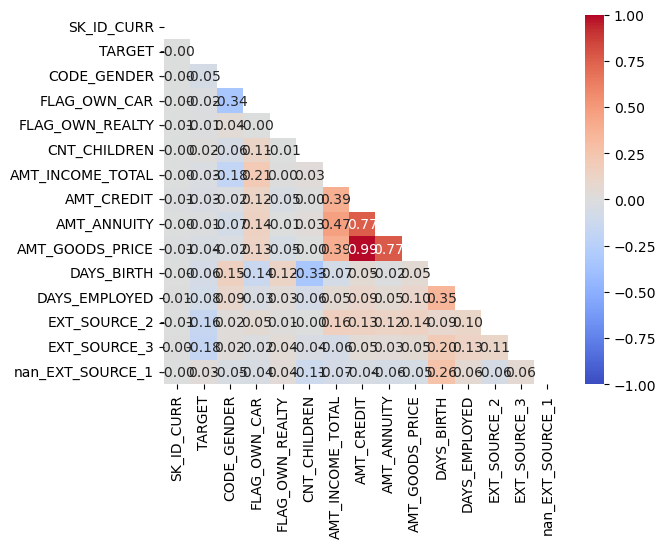

In [28]:
corr = df.select_dtypes(include=np.number).corr()
mask = np.triu(corr)
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap="coolwarm", fmt=".2f", mask=mask)

In [29]:
# on construit la matrice X des Features
X = df.drop(columns="TARGET")
X

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,nan_EXT_SOURCE_1
2533,102954,Cash loans,2,0,1,3,135000.0,729792.0,24246.0,630000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,38.057534,2.156164,0.682576,0.513694,1
160311,285835,Revolving loans,1,1,0,0,450000.0,1350000.0,67500.0,1350000.0,Unaccompanied,Working,Higher education,Married,House / apartment,52.367123,12.065753,0.666005,0.207964,1
125863,245952,Cash loans,1,0,1,0,180000.0,122256.0,12964.5,108000.0,Unaccompanied,State servant,Secondary / secondary special,Single / not married,House / apartment,35.687671,13.991781,0.160485,0.540654,1
242029,380224,Cash loans,1,1,1,0,252000.0,450000.0,24543.0,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,44.794521,5.868493,0.675417,NaN,0
240303,378295,Cash loans,1,1,1,0,166500.0,299772.0,19647.0,247500.0,Unaccompanied,Working,Secondary / secondary special,Married,With parents,32.241096,6.238356,0.262258,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268831,411539,Cash loans,2,1,1,0,135000.0,405000.0,41629.5,405000.0,Family,Pensioner,Secondary / secondary special,Married,House / apartment,55.405479,NaN,0.376371,0.808394,1
267120,409488,Cash loans,2,1,0,0,139500.0,450000.0,27193.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,54.997260,3.210959,0.215600,0.331251,0
296800,443864,Cash loans,2,0,1,0,405000.0,1006920.0,51543.0,900000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,39.219178,1.454795,0.495557,0.368969,0
41140,147634,Cash loans,2,0,1,2,202500.0,545040.0,26640.0,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Widow,House / apartment,38.205479,4.950685,0.303710,0.438281,0


In [30]:
X.sort_values('SK_ID_CURR', ascending = True)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,nan_EXT_SOURCE_1
2,100004,Revolving loans,1,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52.180822,0.616438,0.555912,0.729567,1
9,100012,Revolving loans,1,0,1,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,39.641096,5.531507,0.746644,NaN,1
14,100018,Cash loans,2,0,1,0,189000.0,773680.5,32778.0,679500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,39.953425,0.556164,0.642656,NaN,0
20,100024,Revolving loans,1,1,1,0,135000.0,427500.0,21375.0,427500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,50.005479,11.742466,0.113375,NaN,0
30,100035,Cash loans,2,0,1,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,41.863014,7.309589,0.479987,0.410103,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307478,456218,Cash loans,2,0,1,0,225000.0,1125000.0,40540.5,1125000.0,Family,Commercial associate,Higher education,Married,House / apartment,53.345205,5.106849,0.440537,0.420611,0
307479,456219,Cash loans,2,0,1,1,112500.0,521280.0,31630.5,450000.0,"Spouse, partner",Working,Secondary / secondary special,Married,House / apartment,36.564384,5.402740,0.226036,0.352340,0
307491,456235,Cash loans,1,1,1,2,90000.0,1078200.0,31522.5,900000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,30.071233,5.350685,0.561158,0.716570,0
307497,456241,Cash loans,2,1,1,0,180000.0,270126.0,12028.5,193500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,45.695890,3.347945,0.651306,0.524496,0


In [31]:
df_preprocessed_1000 = X.head(1000)
df_preprocessed_1000

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,nan_EXT_SOURCE_1
2533,102954,Cash loans,2,0,1,3,135000.0,729792.0,24246.0,630000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,38.057534,2.156164,0.682576,0.513694,1
160311,285835,Revolving loans,1,1,0,0,450000.0,1350000.0,67500.0,1350000.0,Unaccompanied,Working,Higher education,Married,House / apartment,52.367123,12.065753,0.666005,0.207964,1
125863,245952,Cash loans,1,0,1,0,180000.0,122256.0,12964.5,108000.0,Unaccompanied,State servant,Secondary / secondary special,Single / not married,House / apartment,35.687671,13.991781,0.160485,0.540654,1
242029,380224,Cash loans,1,1,1,0,252000.0,450000.0,24543.0,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,44.794521,5.868493,0.675417,NaN,0
240303,378295,Cash loans,1,1,1,0,166500.0,299772.0,19647.0,247500.0,Unaccompanied,Working,Secondary / secondary special,Married,With parents,32.241096,6.238356,0.262258,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121675,241068,Cash loans,1,1,1,0,225000.0,417024.0,25200.0,360000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,54.761644,3.958904,0.628169,0.310818,1
180939,309687,Cash loans,2,0,1,0,126000.0,808650.0,23773.5,675000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,53.468493,27.802740,0.527560,0.447179,1
288931,434729,Cash loans,2,0,1,0,270000.0,495801.0,35388.0,468000.0,Family,Working,Higher education,Married,House / apartment,59.052055,24.975342,0.438221,0.691021,0
105558,222487,Cash loans,1,0,1,0,270000.0,728460.0,71095.5,675000.0,Family,Working,Secondary / secondary special,Married,House / apartment,54.342466,8.013699,0.510087,NaN,1


In [32]:
# for FastAPI
df_preprocessed_1000.to_csv('./data/preprocessed/df_preprocessed_1000.csv', index=False)

In [33]:
# On construit l vecteur y des Targets
y = df["TARGET"]
y

2533      0
160311    0
125863    0
242029    1
240303    0
         ..
268831    0
267120    0
296800    0
41140     0
224800    0
Name: TARGET, Length: 30745, dtype: int64

In [34]:
y.values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
def resultize(grid, verbose=2):
    """make results based on gridsearchcv"""

    # make df
    results = pd.DataFrame(grid.cv_results_)

    # clean columns
    cols = [i for i in results.columns if not i.startswith("split")]
    results = results.loc[:, cols]

    if verbose == 2:
        print("coucou")

    return results.round(2)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [37]:
y_train.value_counts(normalize=True)

TARGET
0    0.920158
1    0.079842
Name: proportion, dtype: float64

In [38]:
y_test.value_counts(normalize=True)

TARGET
0    0.919735
1    0.080265
Name: proportion, dtype: float64

## Modelisation

### Refactoring avec utilisation de Pipeline 

### Création du ColumnTransformer

In [39]:
numerical_features = [
    "CODE_GENDER",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "CNT_CHILDREN",
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "AMT_GOODS_PRICE",
    "DAYS_BIRTH",
    "DAYS_EMPLOYED",
    # "EXT_SOURCE_1",
    "EXT_SOURCE_2",
    "EXT_SOURCE_3",
]

categorical_features = [
    "NAME_CONTRACT_TYPE",
    "NAME_TYPE_SUITE",
    "NAME_INCOME_TYPE",
    "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE",
    # "OCCUPATION_TYPE",
    # "ORGANIZATION_TYPE",
]

In [40]:
# Création de 2 Pipelines

numerical_pipeline = make_pipeline(KNNImputer(), StandardScaler())

categorical_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"), OneHotEncoder()
)

In [41]:
# Création du ColumnTransformer
# numerical_pipeline est appliquée sur les numerical_features
# categorical_pipeline est appliquée sur les categorical_features

ColumnTransformer = make_column_transformer(
    (numerical_pipeline, numerical_features),
    (categorical_pipeline, categorical_features),
)
ColumnTransformer

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('knnimputer', KNNImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['CODE_GENDER', 'FLAG_OWN_CAR',
                                  'FLAG_OWN_REALTY', 'CNT_CHILDREN',
                                  'AMT_INCOME_TOTAL', 'AMT_CREDIT',
                                  'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                                  'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_2',
                                  'EXT_SOURCE_3']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE',
                                  'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                                  'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'])])

In [42]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

pipe = Pipeline(
    [
        ("columntransformer", ColumnTransformer),
        #  ("inputer", KNNImputer()),
        #  ("scaler", StandardScaler()),
        ('under_sampler', RandomUnderSampler()),
        ("estimator", DummyClassifier()),
    ]
)

In [43]:
param_grid = {
    "estimator": [
        #DummyClassifier(),
        LogisticRegression(),
        RandomForestClassifier(),
    ],
}

In [44]:
beta = 0.5

scorers = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score),
    'fbeta': make_scorer(fbeta_score, beta=0.5)
}

In [45]:
grid2 = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring=scorers,
    refit='recall',
    cv=3,
    verbose=2,
    return_train_score=True,
    n_jobs=-1,
    error_score='raise'
)
grid2

GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('knnimputer',
                                                                                          KNNImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['CODE_GENDER',
                                                                          'FLAG_OWN_CAR',
                                                                          'FLAG_OWN_REALTY',
                                                                          'CNT_CHILDREN',
                                                                          'AMT_INCOME_TOTAL',
                                                                          'AMT_CREDIT',
                                                                          'AMT_ANNUITY',
                                                                          'AMT_GOODS_PRICE',
                                                                          'DAYS_BIRT...
                                       ('estimator', DummyClassifier())]),
             n_jobs=-1,
             param_grid={'estimator': [LogisticRegression(),
                                       RandomForestClassifier()]},
             refit='recall', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score),
                      'fbeta': make_scorer(fbeta_score, beta=0.5),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)},
             verbose=2)

### MLFlow

In [46]:
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature

In [47]:
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")
mlflow.set_experiment("MLFlow Grid2")

with mlflow.start_run():
    
    grid2.fit(X_train, y_train)

    # Suivre les meilleurs hyperparamètres
    mlflow.log_params(grid2.best_params_)

    # Suivre la meilleure précision obtenue
    best_score = grid2.best_score_
    mlflow.log_metric("best_score", best_score)

    # Suivre le modèle final
    mlflow.sklearn.log_model(grid2.best_estimator_, "model")

    print(f"Meilleurs hyperparamètres: {grid2.best_params_}")
    print(f"Meilleur score: {best_score}")

    # Optionnel : enregistrer toutes les tentatives du GridSearch
    
    for i in range(len(grid2.cv_results_['params'])):
        
        params = grid2.cv_results_['params'][i]
        mlflow.log_params({f"{key}_{i}": value for key, value in params.items()})
        
        mean_test_accuracy = grid2.cv_results_['mean_test_accuracy'][i]
        mean_test_recall = grid2.cv_results_['mean_test_recall'][i]
        mean_test_precision = grid2.cv_results_['mean_test_precision'][i]
        mean_test_f1 = grid2.cv_results_['mean_test_f1'][i]
        
        mlflow.log_metric(f"mean_test_accuracy_{i}", mean_test_accuracy)
        mlflow.log_metric(f"mean_test_recall_{i}", mean_test_recall)
        mlflow.log_metric(f"mean_test_precision_{i}", mean_test_precision)
        mlflow.log_metric(f"mean_test_f1_{i}", mean_test_f1)


2024/09/22 10:09:44 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



Fitting 3 folds for each of 2 candidates, totalling 6 fits


C:\Users\rudyg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2024/09/22 10:11:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Meilleurs hyperparamètres: {'estimator': LogisticRegression()}
Meilleur score: 0.6675788604839409


2024/09/22 10:11:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run polite-hog-932 at: http://127.0.0.1:5000/#/experiments/819142175151914978/runs/b7721f913bda4360b1a4d35b8a1abe9c.
2024/09/22 10:11:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/819142175151914978.


In [48]:
resultize(grid2)

coucou


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,params,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_train_accuracy,...,mean_test_f1,std_test_f1,rank_test_f1,mean_train_f1,std_train_f1,mean_test_fbeta,std_test_fbeta,rank_test_fbeta,mean_train_fbeta,std_train_fbeta
0,18.39,0.51,4.87,0.07,LogisticRegression(),{'estimator': LogisticRegression()},0.68,0.01,1,0.68,...,0.25,0.0,1,0.25,0.0,0.18,0.0,1,0.18,0.0
1,14.68,4.27,4.90,0.86,RandomForestClassifier(),{'estimator': RandomForestClassifier()},0.66,0.01,2,0.71,...,0.23,0.0,2,0.36,0.0,0.17,0.0,2,0.26,0.0


In [49]:
grid2.cv_results_

{'mean_fit_time': array([18.38793357, 14.67565441]),
 'std_fit_time': array([0.51154835, 4.26864055]),
 'mean_score_time': array([4.86935655, 4.89955393]),
 'std_score_time': array([0.07428129, 0.86078785]),
 'param_estimator': masked_array(data=[LogisticRegression(), RandomForestClassifier()],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'estimator': LogisticRegression()},
  {'estimator': RandomForestClassifier()}],
 'split0_test_accuracy': array([0.66848816, 0.64884205]),
 'split1_test_accuracy': array([0.67304189, 0.66653656]),
 'split2_test_accuracy': array([0.68371064, 0.66224304]),
 'mean_test_accuracy': array([0.67508023, 0.65920722]),
 'std_test_accuracy': array([0.0063795 , 0.00753596]),
 'rank_test_accuracy': array([1, 2]),
 'split0_train_accuracy': array([0.67811606, 0.71617226]),
 'split1_train_accuracy': array([0.67401769, 0.71773354]),
 'split2_train_accuracy': array([0.67395264, 0.71044757]),
 'mean_train_accuracy': 

In [50]:
scorers

{'accuracy': make_scorer(accuracy_score),
 'recall': make_scorer(recall_score),
 'precision': make_scorer(precision_score),
 'f1': make_scorer(f1_score),
 'fbeta': make_scorer(fbeta_score, beta=0.5)}

In [51]:
grid2.best_score_

0.6675788604839409

In [52]:
grid2.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['CODE_GENDER',
                                                   'FLAG_OWN_CAR',
                                                   'FLAG_OWN_REALTY',
                                                   'CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
                                                   'EXT_SOURCE_2',
                                                   'EXT_SOURCE_3']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'NAME_TYPE_SUITE',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'NAME_HOUSING_TYPE'])])),
                ('under_sampler', RandomUnderSampler()),
                ('estimator', LogisticRegression())])

In [53]:
best_model = grid2.best_estimator_
best_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['CODE_GENDER',
                                                   'FLAG_OWN_CAR',
                                                   'FLAG_OWN_REALTY',
                                                   'CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
                                                   'EXT_SOURCE_2',
                                                   'EXT_SOURCE_3']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'NAME_TYPE_SUITE',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'NAME_HOUSING_TYPE'])])),
                ('under_sampler', RandomUnderSampler()),
                ('estimator', LogisticRegression())])

In [54]:
bestModel = best_model.named_steps['estimator']
bestModel

LogisticRegression()

In [55]:
X

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,nan_EXT_SOURCE_1
2533,102954,Cash loans,2,0,1,3,135000.0,729792.0,24246.0,630000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,38.057534,2.156164,0.682576,0.513694,1
160311,285835,Revolving loans,1,1,0,0,450000.0,1350000.0,67500.0,1350000.0,Unaccompanied,Working,Higher education,Married,House / apartment,52.367123,12.065753,0.666005,0.207964,1
125863,245952,Cash loans,1,0,1,0,180000.0,122256.0,12964.5,108000.0,Unaccompanied,State servant,Secondary / secondary special,Single / not married,House / apartment,35.687671,13.991781,0.160485,0.540654,1
242029,380224,Cash loans,1,1,1,0,252000.0,450000.0,24543.0,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,44.794521,5.868493,0.675417,NaN,0
240303,378295,Cash loans,1,1,1,0,166500.0,299772.0,19647.0,247500.0,Unaccompanied,Working,Secondary / secondary special,Married,With parents,32.241096,6.238356,0.262258,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268831,411539,Cash loans,2,1,1,0,135000.0,405000.0,41629.5,405000.0,Family,Pensioner,Secondary / secondary special,Married,House / apartment,55.405479,NaN,0.376371,0.808394,1
267120,409488,Cash loans,2,1,0,0,139500.0,450000.0,27193.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,54.997260,3.210959,0.215600,0.331251,0
296800,443864,Cash loans,2,0,1,0,405000.0,1006920.0,51543.0,900000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,39.219178,1.454795,0.495557,0.368969,0
41140,147634,Cash loans,2,0,1,2,202500.0,545040.0,26640.0,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Widow,House / apartment,38.205479,4.950685,0.303710,0.438281,0


In [56]:
# Transformer les données d'entrée
X_transformed = best_model.named_steps['columntransformer'].transform(X)
X_transformed

array([[ 0.71346437, -0.71644261,  0.66831154, ...,  0.        ,
         0.        ,  0.        ],
       [-1.40161168,  1.39578521, -1.49630814, ...,  0.        ,
         0.        ,  0.        ],
       [-1.40161168, -0.71644261,  0.66831154, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.71346437, -0.71644261,  0.66831154, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71346437, -0.71644261,  0.66831154, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71346437, -0.71644261, -1.49630814, ...,  0.        ,
         0.        ,  0.        ]])

In [57]:
import shap

# Créer l'explainer SHAP pour le modèle de régression logistique
explainer = shap.LinearExplainer(best_model.named_steps['estimator'], X_transformed, feature_perturbation="interventional")

C:\Users\rudyg\anaconda3\lib\site-packages\shap\explainers\_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


In [58]:
shap_values = explainer.shap_values(X_transformed)
shap_values

array([[-0.10532671,  0.05175135,  0.01669287, ...,  0.00524832,
         0.00026921, -0.00823382],
       [ 0.17184884, -0.10997162, -0.04513257, ...,  0.00524832,
         0.00026921, -0.00823382],
       [ 0.17184884,  0.05175135,  0.01669287, ...,  0.00524832,
         0.00026921, -0.00823382],
       ...,
       [-0.10532671,  0.05175135,  0.01669287, ...,  0.00524832,
         0.00026921, -0.00823382],
       [-0.10532671,  0.05175135,  0.01669287, ...,  0.00524832,
         0.00026921, -0.00823382],
       [-0.10532671,  0.05175135, -0.04513257, ...,  0.00524832,
         0.00026921, -0.00823382]])

In [59]:
shap_values.shape

(30745, 41)

In [60]:
shap_values[30000]

array([ 1.71848836e-01,  5.17513494e-02, -4.51325673e-02,  1.49956058e-02,
       -1.29464894e-03,  5.20213966e-01,  2.40566564e-02, -4.84890272e-01,
        1.38879544e-02,  7.74344308e-02,  2.75965796e-01,  5.19491287e-01,
        5.07148334e-03,  7.91652812e-03,  1.31817336e-03,  4.58427168e-02,
       -0.00000000e+00,  0.00000000e+00, -1.82881261e-03,  5.50858748e-03,
        1.94319354e-02, -1.03070417e-02, -3.20594487e-03,  1.73993949e-02,
        4.10337209e-02,  0.00000000e+00,  1.66329085e-02,  1.48280103e-02,
        3.54848630e-04,  7.71056430e-02, -1.45757463e-02, -1.83465199e-02,
       -1.90054638e-02, -1.29627187e-02,  4.17664047e-02,  0.00000000e+00,
        7.30653264e-02,  1.94610579e-01,  5.24832090e-03,  2.69213890e-04,
       -8.23381939e-03])

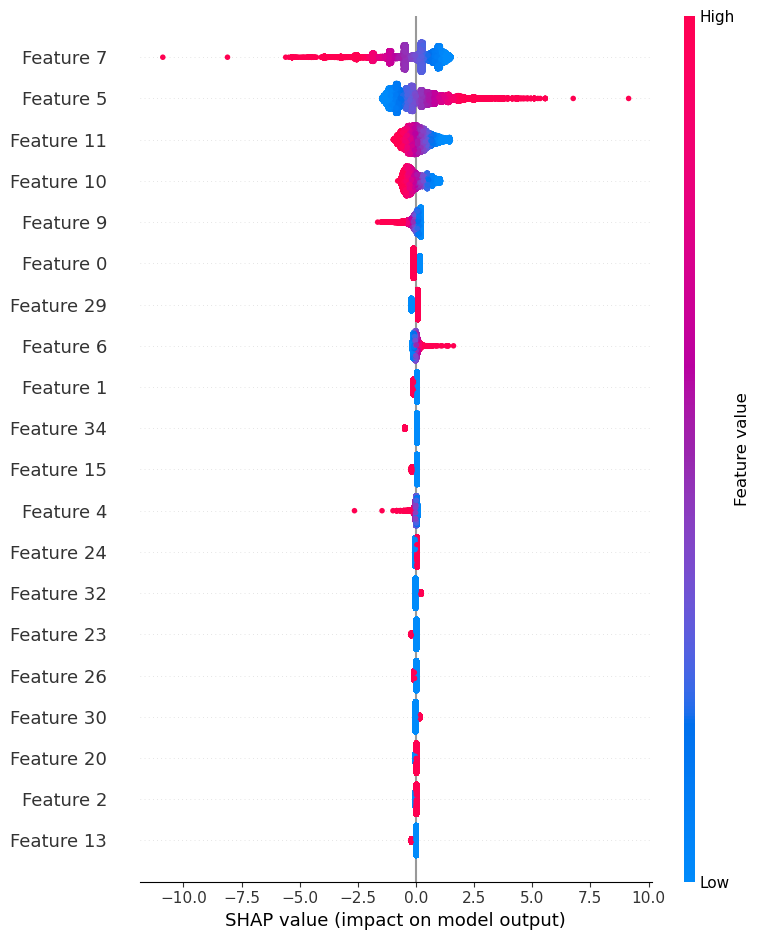

In [61]:
shap.summary_plot(shap_values, X_transformed)

In [62]:
best_pipe = grid2.best_estimator_
best_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['CODE_GENDER',
                                                   'FLAG_OWN_CAR',
                                                   'FLAG_OWN_REALTY',
                                                   'CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
                                                   'EXT_SOURCE_2',
                                                   'EXT_SOURCE_3']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'NAME_TYPE_SUITE',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'NAME_HOUSING_TYPE'])])),
                ('under_sampler', RandomUnderSampler()),
                ('estimator', LogisticRegression())])

In [63]:
preprocessor_pipe = best_pipe[:-1]
preprocessor_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['CODE_GENDER',
                                                   'FLAG_OWN_CAR',
                                                   'FLAG_OWN_REALTY',
                                                   'CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
                                                   'EXT_SOURCE_2',
                                                   'EXT_SOURCE_3']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'NAME_TYPE_SUITE',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'NAME_HOUSING_TYPE'])])),
                ('under_sampler', RandomUnderSampler())])

In [64]:
X_transf = pd.DataFrame(X_transformed, columns=preprocessor_pipe.get_feature_names_out())
X_transf

,pipeline-1__CODE_GENDER,pipeline-1__FLAG_OWN_CAR,pipeline-1__FLAG_OWN_REALTY,pipeline-1__CNT_CHILDREN,pipeline-1__AMT_INCOME_TOTAL,pipeline-1__AMT_CREDIT,pipeline-1__AMT_ANNUITY,pipeline-1__AMT_GOODS_PRICE,pipeline-1__DAYS_BIRTH,pipeline-1__DAYS_EMPLOYED,...,pipeline-2__NAME_FAMILY_STATUS_Married,pipeline-2__NAME_FAMILY_STATUS_Separated,pipeline-2__NAME_FAMILY_STATUS_Single / not married,pipeline-2__NAME_FAMILY_STATUS_Widow,pipeline-2__NAME_HOUSING_TYPE_Co-op apartment,pipeline-2__NAME_HOUSING_TYPE_House / apartment,pipeline-2__NAME_HOUSING_TYPE_Municipal apartment,pipeline-2__NAME_HOUSING_TYPE_Office apartment,pipeline-2__NAME_HOUSING_TYPE_Rented apartment,pipeline-2__NAME_HOUSING_TYPE_With parents
0,0.713464,-0.716443,0.668312,3.593921,-0.344901,0.330643,-0.197468,0.255441,-0.483686,-0.739454,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-1.401612,1.395785,-1.496308,-0.581312,2.936553,1.880121,2.800977,2.217978,0.707376,0.947301,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-1.401612,-0.716443,0.668312,-0.581312,0.123878,-1.187176,-0.979522,-1.167398,-0.680942,1.275139,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-1.401612,1.395785,0.668312,-0.581312,0.873924,-0.368367,-0.176879,-0.235193,0.077069,-0.107562,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-1.401612,1.395785,0.668312,-0.581312,-0.016756,-0.743684,-0.516279,-0.787157,-0.967819,-0.044606,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30740,0.713464,1.395785,0.668312,-0.581312,-0.344901,-0.480791,1.007587,-0.357852,0.960275,-0.739827,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30741,0.713464,1.395785,-1.496308,-0.581312,-0.298023,-0.368367,0.006858,-0.235193,0.926296,-0.559913,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30742,0.713464,-0.716443,0.668312,-0.581312,2.467773,1.022997,1.694809,0.991392,-0.386996,-0.858838,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30743,0.713464,-0.716443,0.668312,2.202177,0.358267,-0.130926,-0.031511,-0.235193,-0.471372,-0.263786,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [65]:
df_client_id = df.loc[df['SK_ID_CURR'] == int(415187), :]
df_client_id

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,nan_EXT_SOURCE_1


In [66]:
df_client_id = df.loc[df['SK_ID_CURR'] == int(415187), :]
df_client_id

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,nan_EXT_SOURCE_1


In [67]:
shap_values[2].reshape(1, -1)

array([[ 1.71848836e-01,  5.17513494e-02,  1.66928673e-02,
        -5.40657897e-03, -1.69808987e-02, -1.25324368e+00,
        -1.01887830e-01,  1.29503387e+00,  9.26106555e-03,
        -3.16701178e-01,  7.03045170e-01, -3.43575897e-02,
         5.07148334e-03,  7.91652812e-03,  1.31817336e-03,
         4.58427168e-02, -0.00000000e+00,  0.00000000e+00,
        -1.82881261e-03,  5.50858748e-03,  1.94319354e-02,
        -1.03070417e-02, -3.20594487e-03, -2.00093042e-01,
        -4.27085666e-02,  0.00000000e+00,  1.66329085e-02,
         1.48280103e-02,  3.54848630e-04,  7.71056430e-02,
        -1.45757463e-02,  2.99337956e-02, -1.90054638e-02,
         8.67505019e-02,  4.17664047e-02,  0.00000000e+00,
        -9.03054597e-03, -1.96576343e-03,  5.24832090e-03,
         2.69213890e-04, -8.23381939e-03]])

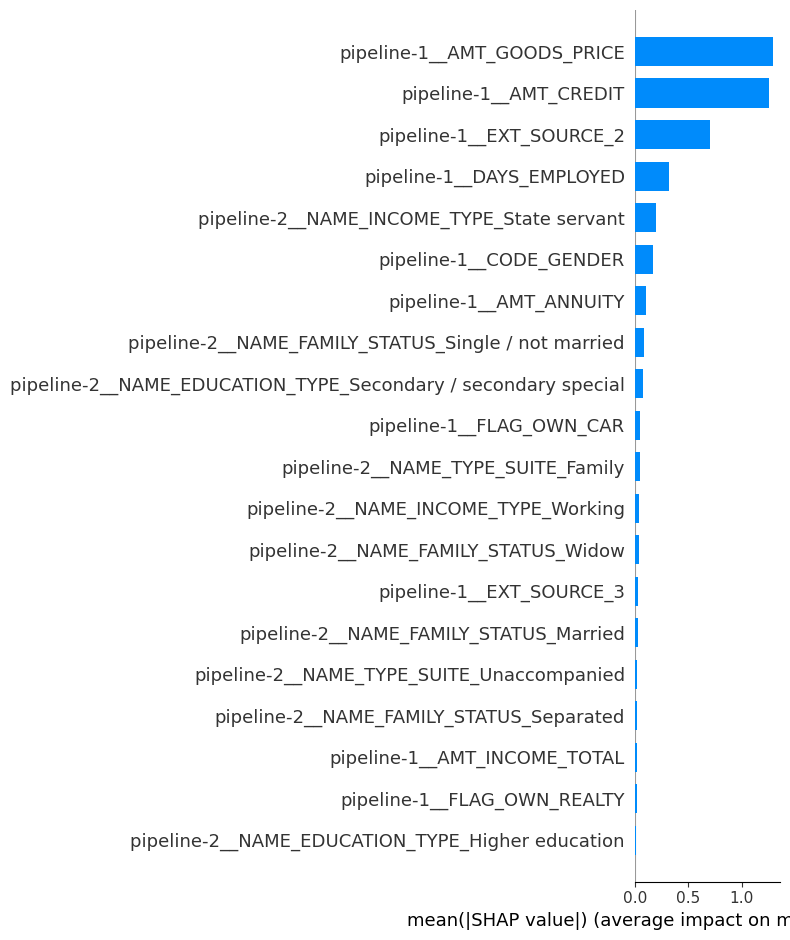

In [68]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
shap.summary_plot(shap_values[2].reshape(1, -1), X_transformed[2].reshape(1, -1), plot_type="bar", feature_names=preprocessor_pipe.get_feature_names_out())


In [69]:
import joblib
joblib.dump(grid2, './data/preprocessed/grid2_export.pk')

['./data/preprocessed/grid2_export.pk']